In [1]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime, Stream
from obspy.imaging.spectrogram import spectrogram
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

client = Client("IRIS")

## Important to note:
The quality factor, or Q-factor, of basaltic rock is typically around 100-200, meaning that we are likely to see greater attenuation. The Hawaiian islands are primarily basaltic rock, which means that the further from the epicenter of some seismic event we measure, the fewer high frequency components we will expect to see.

## Potentially important sources
[Pre-Eruptive Prediction](https://earth-planets-space.springeropen.com/articles/10.1186/s40623-020-01199-x) </br>
[Seismic Attenuation](https://wiki.seg.org/wiki/Seismic_attenuation)

In [2]:
inventory = client.get_stations(network="HV", station="HMLE", channel="HNZ")

In [3]:
[n for n in inventory.networks]

[Network HV (Hawaiian Volcano Observatory Network (HVO))
	Station Count: 1/113 (Selected/Total)
	1956-01-01T00:00:00.000000Z - --
	Access: open
	Contains:
		Stations (1):
			HV.HMLE (Mauna Loa Estates, HI)
		Channels (0):
]

In [4]:
inventory.networks[0].stations

[Station HMLE (Mauna Loa Estates, HI)
	Station Code: HMLE
	Channel Count: 0/6 (Selected/Total)
	2012-05-03T00:00:00.000000Z - 
	Access: open 
	Latitude: 19.4256, Longitude: -155.2201, Elevation: 1108.0 m
	Available Channels:
]

In [5]:
starttime = UTCDateTime(2018, 5, 4, 0)
endtime = UTCDateTime(2018, 9, 4, 0)
inv = client.get_stations(network="HV", latitude=19.4256, longitude=-155.2201, maxradius=.5, 
                          startbefore=starttime, endafter=endtime, level="station", channel="HHZ", location="*")
print(inv)

Inventory created at 2023-04-19T22:21:22.430500Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?network=HV&location=...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			HV
		Stations (22):
			HV.AIND (Ainapo Ranch, Hawaii Digital)
			HV.BYL (Byron's Ledge)
			HV.DEVL (Devil's Throat)
			HV.HAT (Halemaumau Trail)
			HV.HLPD (Hilina Pali Digital)
			HV.HSSD (Humuluula Sheep Station Digital)
			HV.JCUZ (Jacuzzi)
			HV.JOKA (Jonika Flow)
			HV.MLOD (Mauna Loa Digital)
			HV.MOKD (Mokuaweoweo Crater Digital)
			HV.NPOC (North of Puu Oo)
			HV.OBL (Observatory Bluff)
			HV.PAUD (Pauahi, Hawaii Digital)
			HV.PUHI (Puhimau Thermal Area)
			HV.RIMD (Caldera Rim Hawaii Digital)
			HV.SBL (Steam Bluff Hawaii)
			HV.SDH (Sand Hill)
			HV.STCD (Steam Cracks Hawaii Digital)
			HV.TOUO (Tube O'o Hawaii)
			HV.UWB (Uwekahuna Bluff Hawaii)
			HV.UWE (Uwekahuna Vault Hawaii)
			HV.WRM (West Rim Hawaii Digital)


In [34]:
def numfmt(x, pos): # your custom formatter function: divide by 100.0
    s = '{}'.format(x / 1000.0)
    return s

import matplotlib.ticker as tkr     # has classes for tick-locating and -formatting


def plotWaveData(waveStream, event):
    
    yfmt = tkr.FuncFormatter(numfmt)
    
    fig = plt.figure()
    fig = waveStream.plot(fig=fig, show=False)
    fig.set_figheight(6)
    fig.set_figwidth(9.8)
    plt.ylabel('Velocity [km/s]', fontsize=16)
    plt.yticks(rotation=90)
    plt.xlabel('Time [UTCDateTime]', fontsize=16)
    plt.title(event + " Seismic Waveform", fontsize=19)
    
    plt.gca().yaxis.set_major_formatter(yfmt)
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots()
    spect = waveStream.spectrogram(dbscale=False, axes=ax)

    mappable = ax.images[0]

    spect_min = mappable.get_array().min()
    spect_max = mappable.get_array().max()


    norm = colors.LogNorm(vmin=spect_min, vmax=spect_max)
    mappable.set_norm(norm)

    fig.set_figheight(6)
    fig.set_figwidth(12)
    fig.colorbar(mappable=mappable, label="Amplitude")
    plt.ylabel('Frequency [Hz]', fontsize=16)
    plt.xlabel('Time [sec]', fontsize=16)
    plt.title(event + " Spectrogram " + str(waveStream[0].stats.starttime), fontsize=19)
    plt.tight_layout()
    plt.show()
    

May 3, 2018 </br>
Sept 4, 2018 </br>
Kilauea </br>
Planned stations + channels: </br>


In [7]:
'''
# Waveform from station HMLE, Mauna Loa Estates, Lat. 19.425621, Lon. -155.220093


# use earthquake data 6.8 magnitude from May 4th.

# May 29th 5+ magnitude earthquake

st = client.get_waveforms(
    network="HV", station="NPOC", channel="HHZ",location="*",
    starttime=UTCDateTime(2018, 5, 4, 0, 0),
    endtime=UTCDateTime(2018, 5, 4, 9, 35))
'''

'\n# Waveform from station HMLE, Mauna Loa Estates, Lat. 19.425621, Lon. -155.220093\n\n\n# use earthquake data 6.8 magnitude from May 4th.\n\n# May 29th 5+ magnitude earthquake\n\nst = client.get_waveforms(\n    network="HV", station="NPOC", channel="HHZ",location="*",\n    starttime=UTCDateTime(2018, 5, 4, 0, 0),\n    endtime=UTCDateTime(2018, 5, 4, 9, 35))\n'

In [8]:
startTimeStart = UTCDateTime(2018, 5, 3, 20, 15)
startTimeEnd = UTCDateTime(2018, 5, 3, 20, 30)

In [9]:
startJCUZ = client.get_waveforms(
    network="HV", station="JCUZ", channel="HHZ",location="*",
    starttime=startTimeStart,
    endtime=startTimeEnd)

In [10]:
startTOUO = client.get_waveforms(
    network="HV", station="TOUO", channel="HHZ",location="*",
    starttime=startTimeStart,
    endtime=startTimeEnd)

In [11]:
may4TimeStart = UTCDateTime(2018, 5, 4, 21, 0)
may4TimeEnd = UTCDateTime(2018, 5, 4, 21, 15)

In [12]:
may4EQJCUZ = client.get_waveforms(
    network="HV", station="JCUZ", channel="HHZ",location="*",
    starttime=may4TimeStart,
    endtime=may4TimeEnd)

In [13]:
may4EQTOUO = client.get_waveforms(
    network="HV", station="TOUO", channel="HHZ",location="*",
    starttime=may4TimeStart,
    endtime=may4TimeEnd)

In [14]:
may4EQJOKA = client.get_waveforms(
    network="HV", station="JOKA", channel="HHZ",location="*",
    starttime=may4TimeStart,
    endtime=may4TimeEnd)

In [15]:
explTimeStart = UTCDateTime(2018, 5, 16, 21, 15)
explTimeEnd = UTCDateTime(2018, 5, 16, 21, 31)

In [16]:
explJCUZ = client.get_waveforms(
    network="HV", station="JCUZ", channel="HHZ",location="*",
    starttime=explTimeStart,
    endtime=explTimeEnd)

In [17]:
caldTimeStart = UTCDateTime(2018, 5, 29, 11, 40)
caldTimeEnd = UTCDateTime(2018, 5, 29, 11, 55)

In [18]:
caldCLJCUZ = client.get_waveforms(
    network="HV", station="JCUZ", channel="HHZ",location="*",
    starttime=caldTimeStart,
    endtime=caldTimeEnd)

In [19]:
endTimeStart = UTCDateTime(2018, 10, 5, 17, 30)
endTimeEnd = UTCDateTime(2018, 10, 5, 17, 45)

In [20]:
endJCUZ = client.get_waveforms(
    network="HV", station="JCUZ", channel="HHZ",location="*",
    starttime=endTimeStart,
    endtime=endTimeEnd)

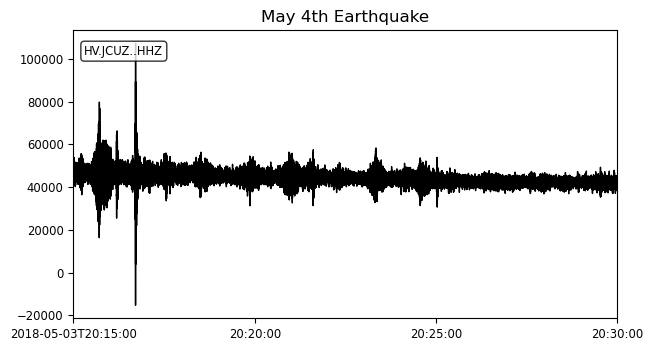

In [21]:
fig = plt.figure()
fig = startJCUZ.plot(fig=fig, show=False)

plt.title("May 4th Earthquake")
plt.show()

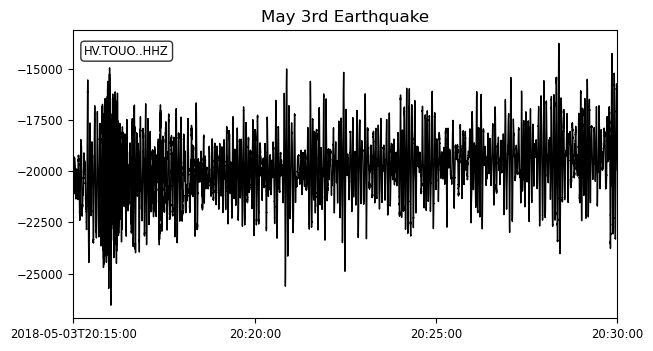

In [22]:
fig = plt.figure()
fig = startTOUO.plot(fig=fig, show=False)

plt.title("May 3rd Earthquake")
plt.show()

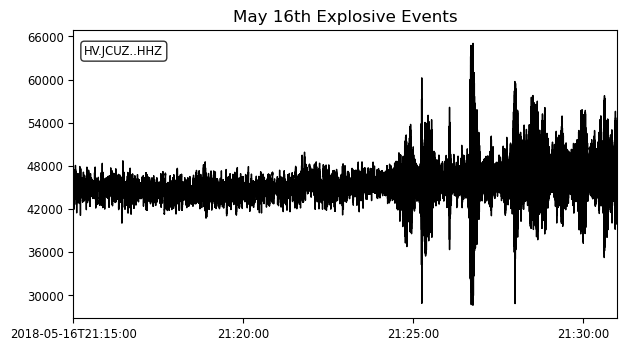

In [23]:
fig = plt.figure()
fig = explJCUZ.plot(fig=fig, show=False)

plt.title("May 16th Explosive Events")
plt.show()

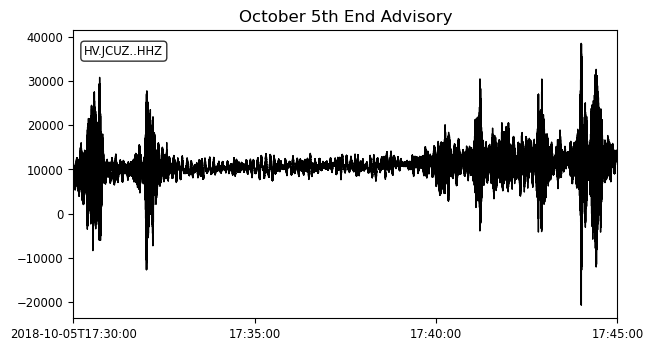

In [24]:
fig = plt.figure()
fig = endJCUZ.plot(fig=fig, show=False)

plt.title("October 5th End Advisory")
plt.show()

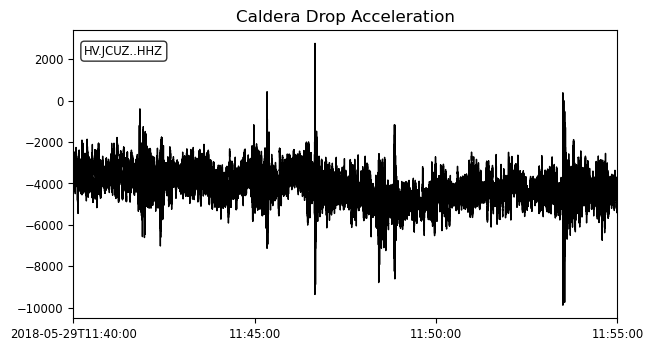

In [25]:
fig = plt.figure()
fig = caldCLJCUZ.plot(fig=fig, show=False)

plt.title("Caldera Drop Acceleration")
plt.show()

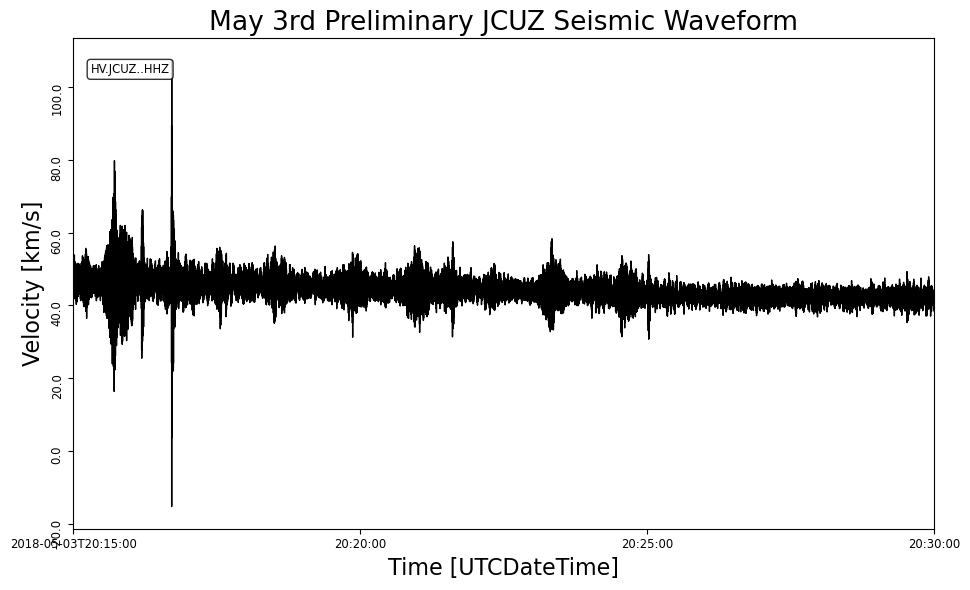

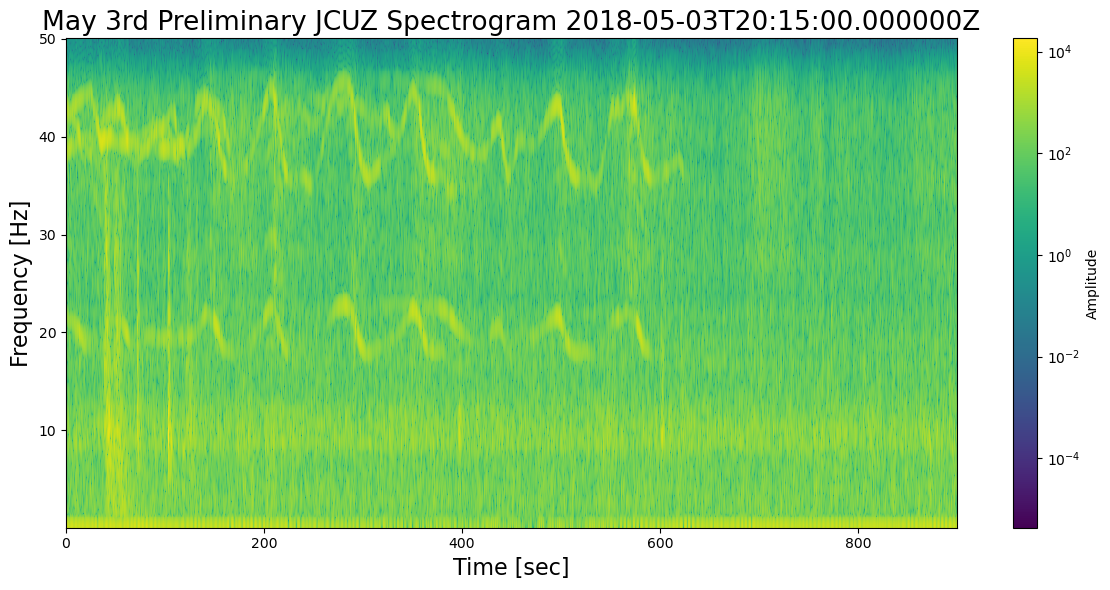

In [35]:
plotWaveData(startJCUZ, "May 3rd Preliminary JCUZ")

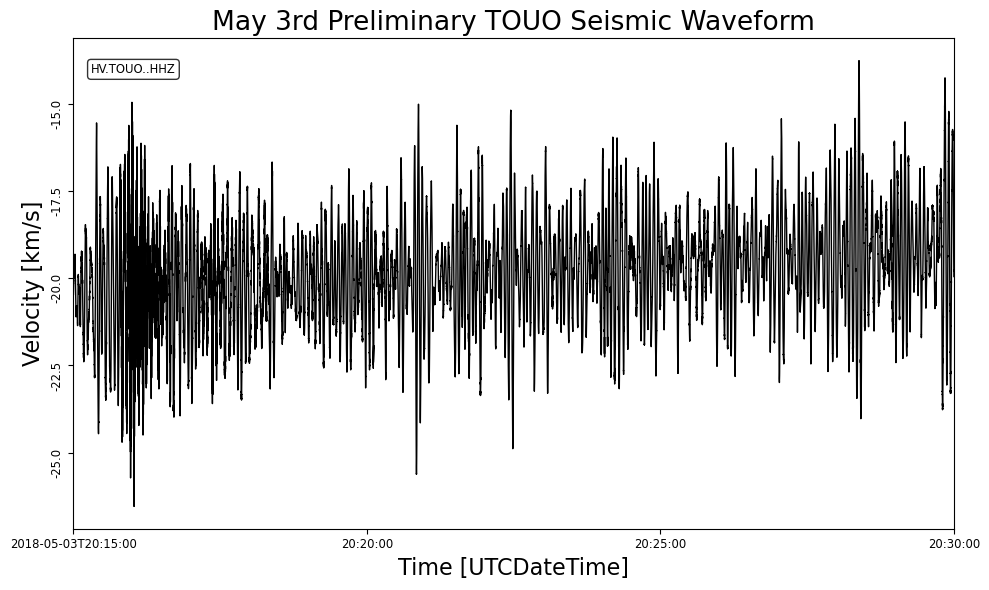

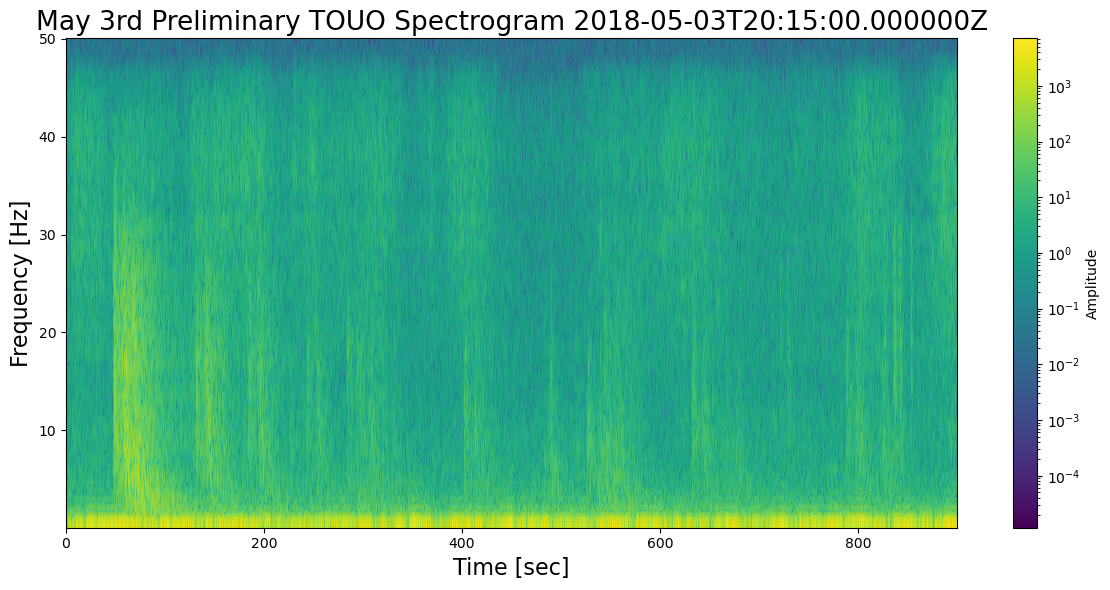

In [27]:
plotWaveData(startTOUO, "May 3rd Preliminary TOUO")

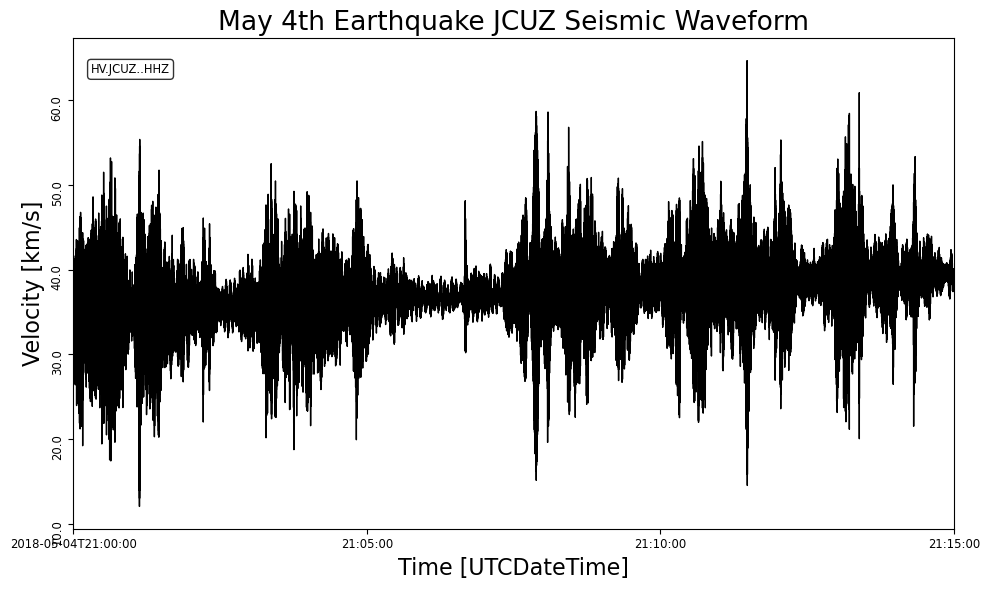

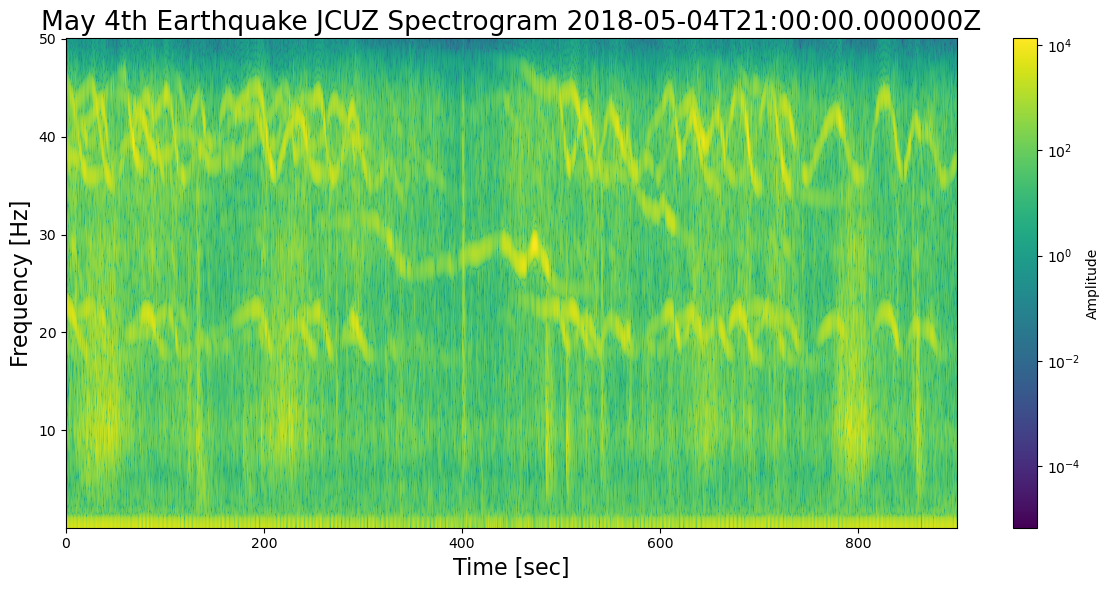

In [28]:
plotWaveData(may4EQJCUZ, "May 4th Earthquake JCUZ")

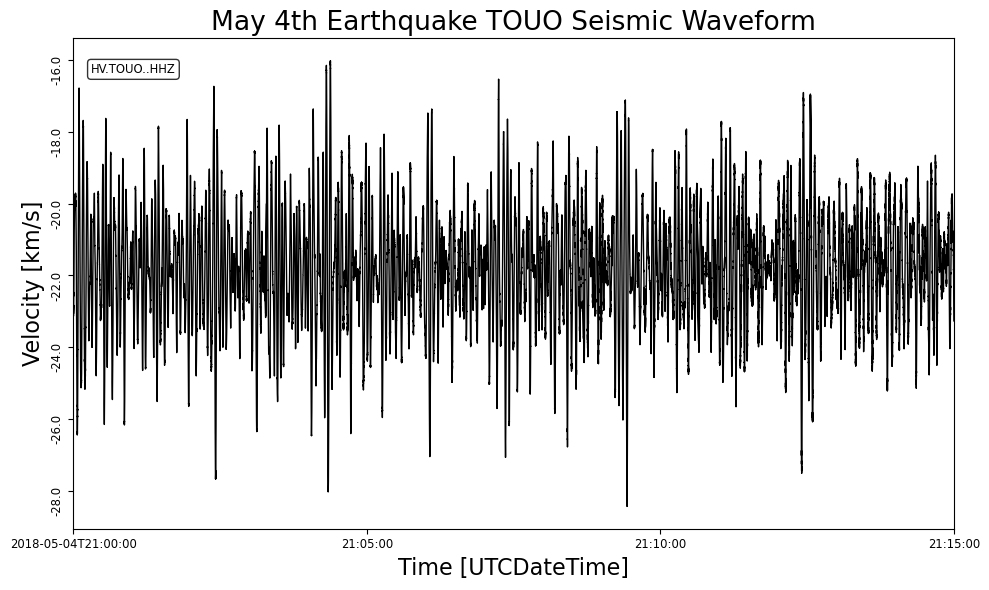

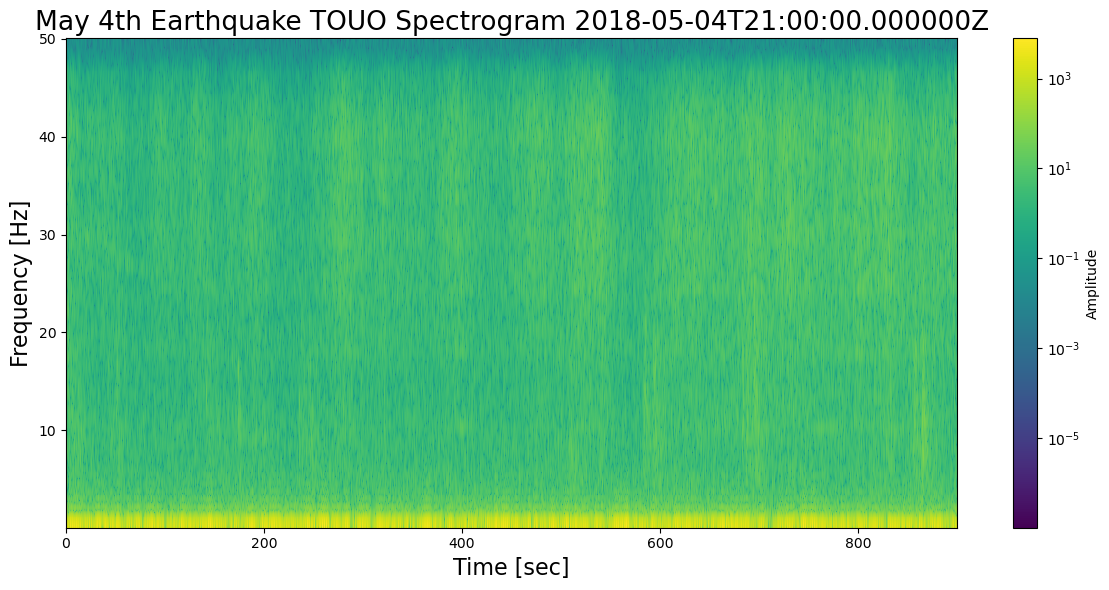

In [29]:
plotWaveData(may4EQTOUO, "May 4th Earthquake TOUO")

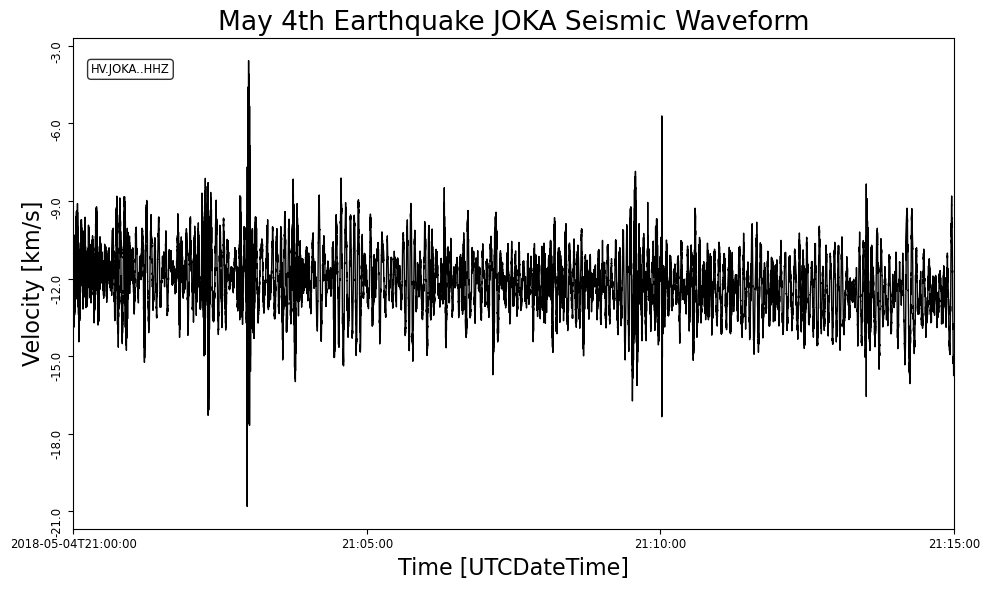

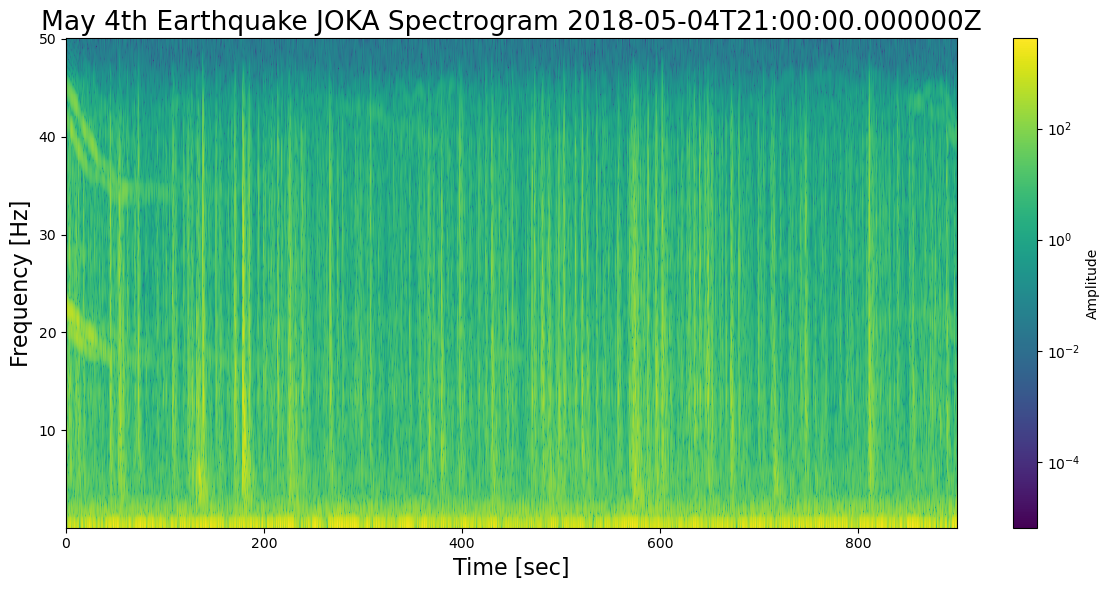

In [30]:
plotWaveData(may4EQJOKA, "May 4th Earthquake JOKA")

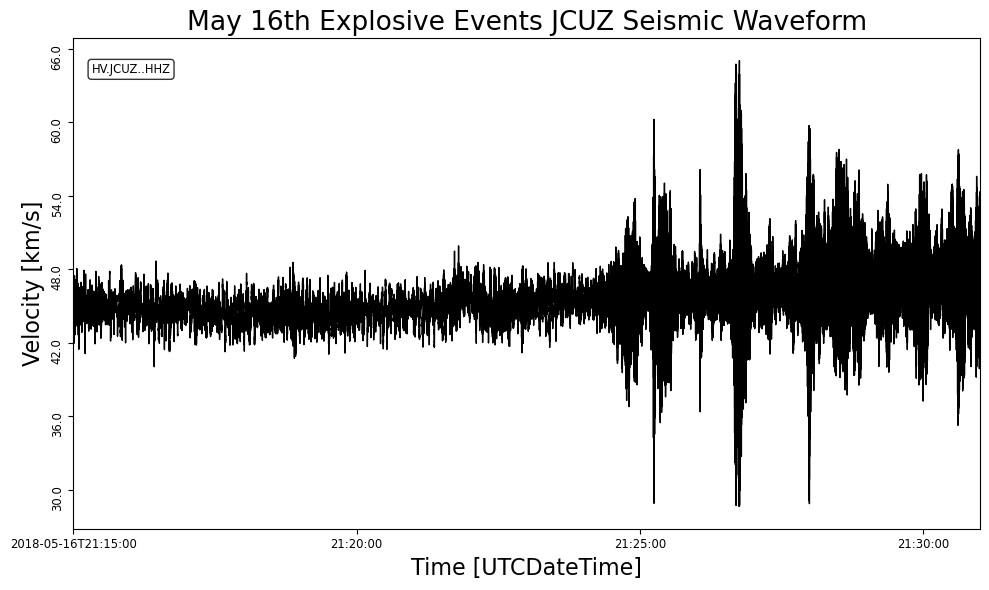

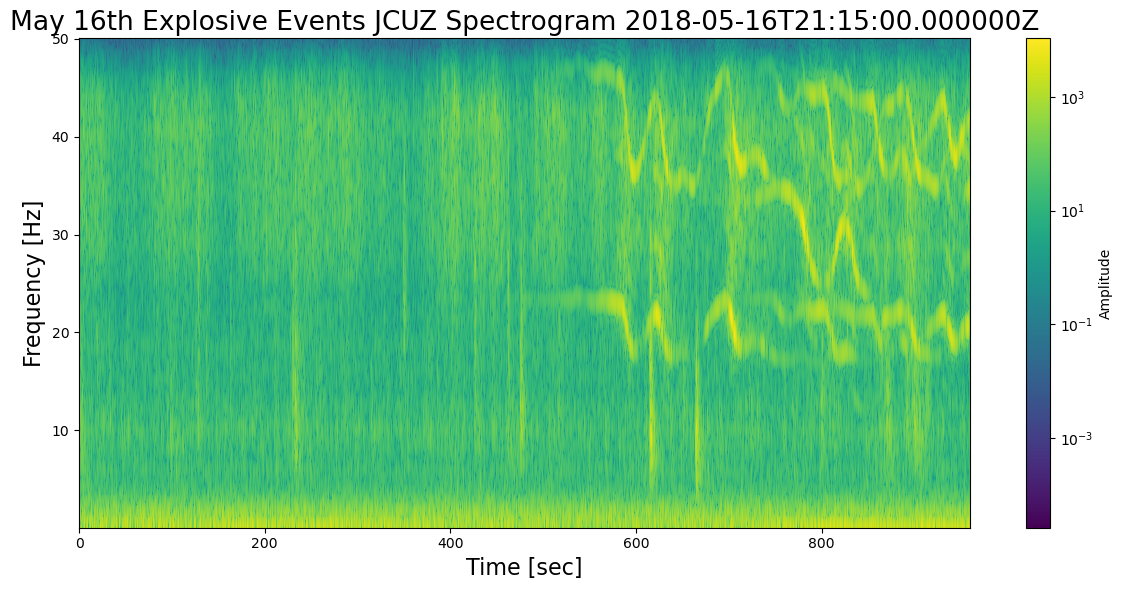

In [31]:
plotWaveData(explJCUZ, "May 16th Explosive Events JCUZ")

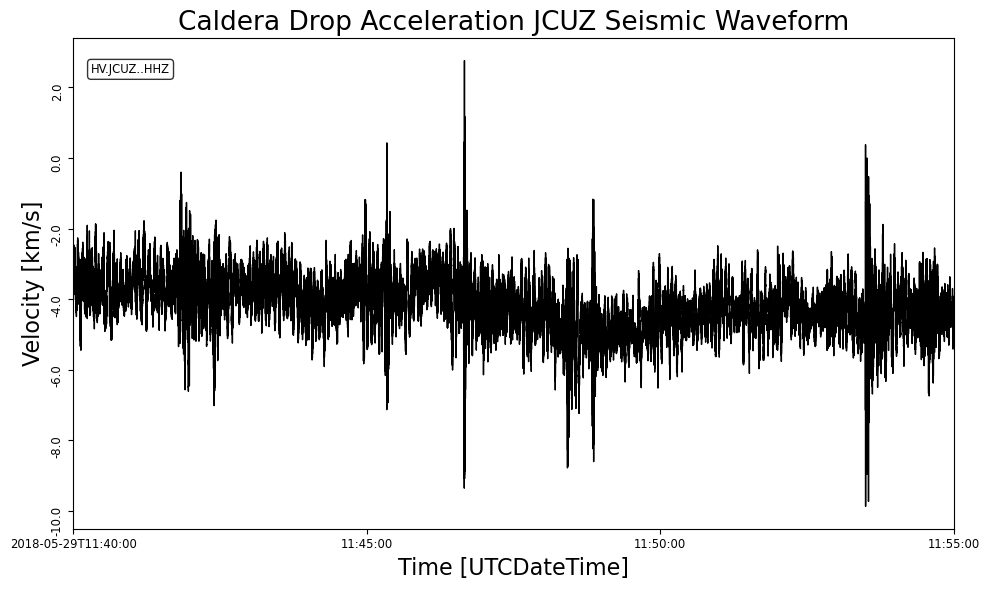

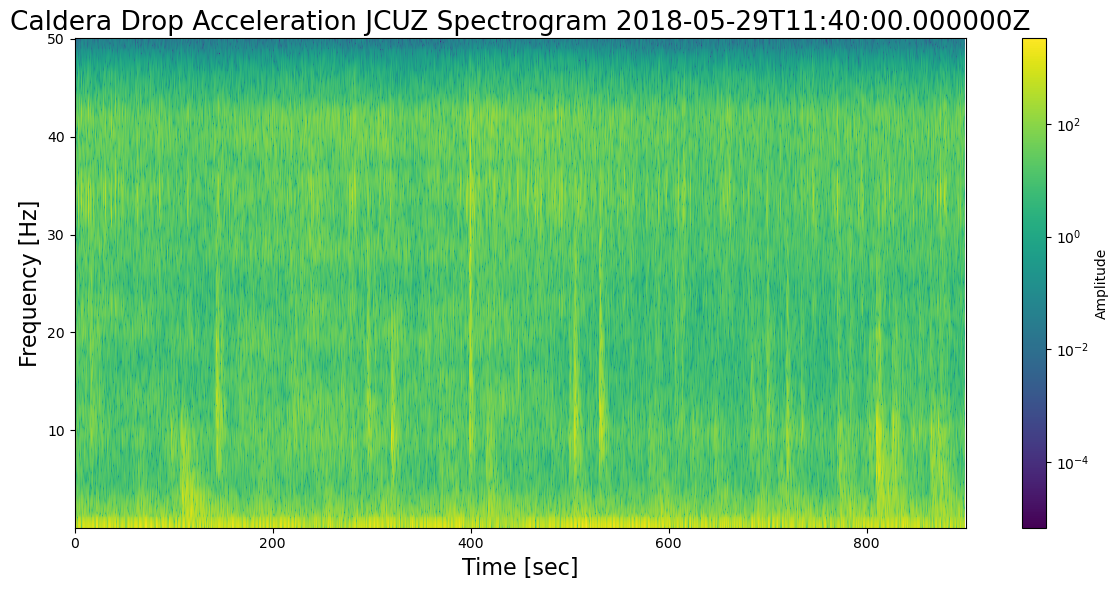

In [32]:
plotWaveData(caldCLJCUZ, "Caldera Drop Acceleration JCUZ")

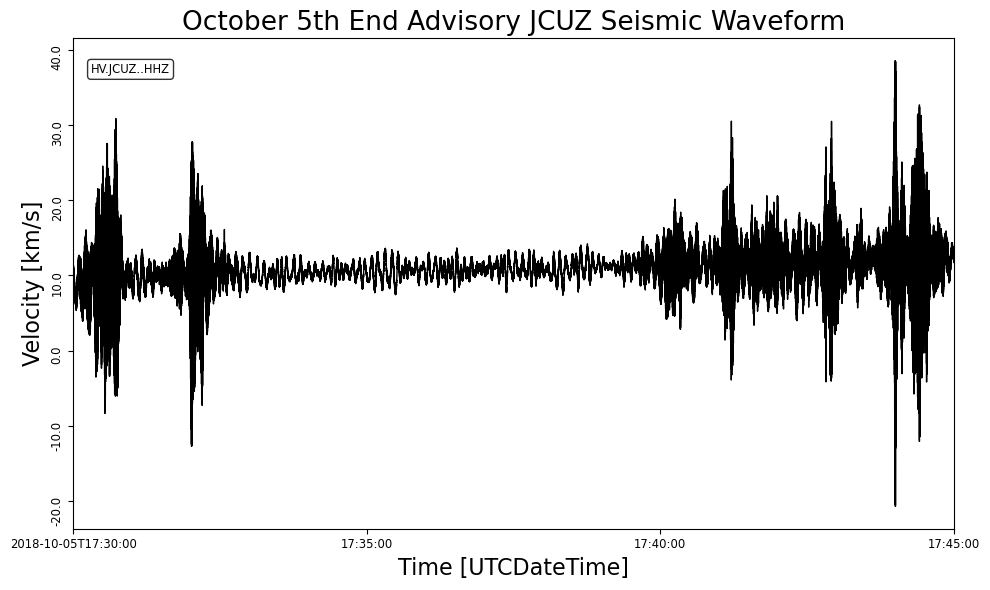

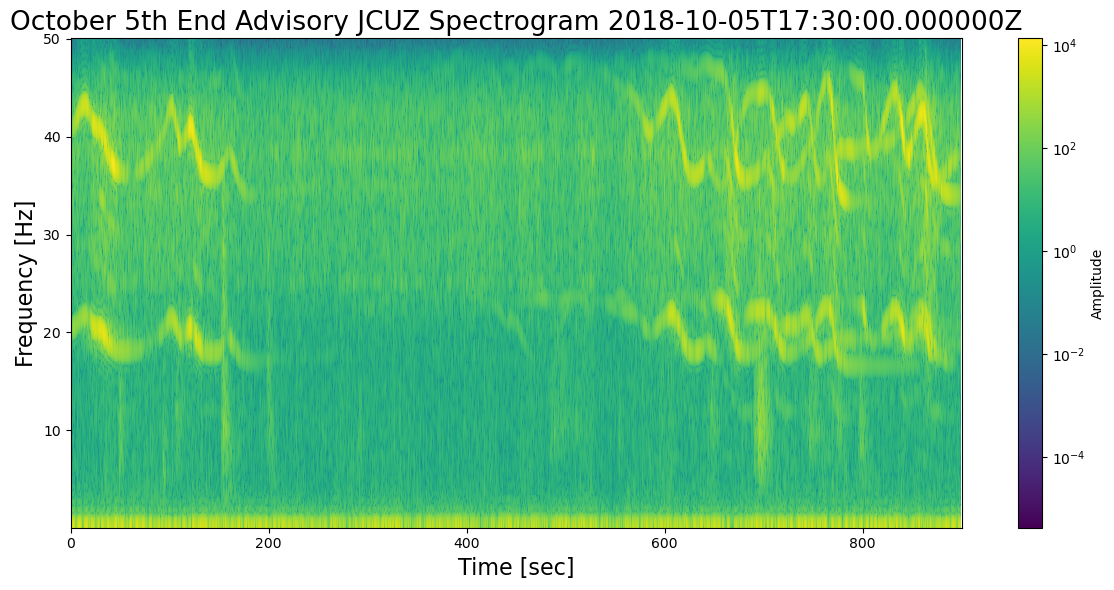

In [33]:
plotWaveData(endJCUZ, "October 5th End Advisory JCUZ")